In [ ]:
!pip install openpyxl

In [5]:
import pandas as pd
pd.set_option('display.max_columns', None) #Pour voir toutes les colonnes
df = pd.read_excel("dataset_02052023.xlsx", engine='openpyxl')
print(df.head())
df.shape

   Num                 Timestamp  Current_J0  Temperature_T0  Current_J1  \
0    1  2022-10-26T08:17:21.847Z    0.109628          27.875   -2.024669   
1    2  2022-10-26T08:17:22.852Z    0.595605          27.875   -2.278456   
2    3  2022-10-26T08:17:23.857Z   -0.229474          27.875   -2.800408   
3    4  2022-10-26T08:17:24.863Z    0.065053          27.875   -3.687768   
4    5  2022-10-26T08:17:25.877Z    0.884140          27.875   -2.938830   

   Temperature_J1  Current_J2  Temperature_J2  Current_J3  Temperature_J3  \
0         29.3750   -1.531442         29.3750   -0.998570         32.1250   
1         29.3125   -0.866556         29.4375   -0.206097         32.1875   
2         29.3125   -2.304336         29.4375   -0.351499         32.1250   
3         29.3125   -1.217652         29.4375   -1.209115         32.1250   
4         29.3750   -1.794076         29.4375   -2.356471         32.1875   

   Current_J4  Temperature_J4  Current_J5  Temperature_J5      Speed_J0  \
0   -

(7409, 24)

# Analyse et prétraitement des données

In [6]:
df = df.drop(columns=['Num'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Timestamp             7409 non-null   object 
 1   Current_J0            7363 non-null   float64
 2   Temperature_T0        7355 non-null   float64
 3   Current_J1            7355 non-null   float64
 4   Temperature_J1        7355 non-null   float64
 5   Current_J2            7355 non-null   float64
 6   Temperature_J2        7355 non-null   float64
 7   Current_J3            7355 non-null   float64
 8   Temperature_J3        7355 non-null   float64
 9   Current_J4            7355 non-null   float64
 10  Temperature_J4        7355 non-null   float64
 11  Current_J5            7355 non-null   float64
 12  Temperature_J5        7355 non-null   float64
 13  Speed_J0              7355 non-null   float64
 14  Speed_J1              7355 non-null   float64
 15  Speed_J2             

In [7]:
print(df.describe())

        Current_J0  Temperature_T0   Current_J1  Temperature_J1   Current_J2  \
count  7363.000000     7355.000000  7355.000000     7355.000000  7355.000000   
mean     -0.048934       34.906781    -2.297936       37.659636    -1.199381   
std       0.829395        2.762057     0.800450        3.247315     0.609984   
min      -6.247756       27.812500    -5.808734       29.312500    -4.171966   
25%      -0.195026       33.000000    -2.664919       35.375000    -1.552803   
50%      -0.080830       36.500000    -2.236342       39.687500    -1.077137   
75%       0.095959       37.062500    -1.778334       40.125000    -0.838721   
max       6.806938       37.250000     1.083596       40.500000     2.464940   

       Temperature_J2   Current_J3  Temperature_J3   Current_J4  \
count     7355.000000  7355.000000     7355.000000  7355.000000   
mean        38.064064    -0.605312       40.936999    -0.022968   
std          3.311948     0.514937        3.182399     0.630789   
min        

In [8]:
missing_counts = df.isnull().sum()
missing_columns = missing_counts[missing_counts > 0]
print("Colonnes avec valeurs manquantes :\n")
print(missing_columns)

Colonnes avec valeurs manquantes :

Current_J0              46
Temperature_T0          54
Current_J1              54
Temperature_J1          54
Current_J2              54
Temperature_J2          54
Current_J3              54
Temperature_J3          54
Current_J4              54
Temperature_J4          54
Current_J5              54
Temperature_J5          54
Speed_J0                54
Speed_J1                54
Speed_J2                54
Speed_J3                54
Speed_J4                54
Speed_J5                54
Tool_current            54
Robot_ProtectiveStop    54
dtype: int64


In [9]:
df= df.dropna()
print(f"Lignes restantes après suppression : {len(df)}")

Lignes restantes après suppression : 7355


In [10]:
std = df.drop(columns=['Timestamp']).std()

print("Ecart type de toutes les colonnes :\n")
print(std)

Ecart type de toutes les colonnes :

Current_J0               0.829123
Temperature_T0           2.762057
Current_J1               0.800450
Temperature_J1           3.247315
Current_J2               0.609984
Temperature_J2           3.311948
Current_J3               0.514937
Temperature_J3           3.182399
Current_J4               0.630789
Temperature_J4           3.677670
Current_J5               0.129141
Temperature_J5           3.680003
Speed_J0                 0.148826
Speed_J1                 0.049370
Speed_J2                 0.729422
Speed_J3                 0.359999
Speed_J4                 0.038436
Speed_J5                 0.313953
Tool_current             0.078832
cycle                   80.512697
Robot_ProtectiveStop     0.190719
grip_lost                0.178750
dtype: float64


In [11]:
#Suppression des colonnes à faible écart type (< 0.1)
columns_to_keep = std[std >= 0.1].index
df_filtered = df[columns_to_keep]
df_filtered['Timestamp'] = df['Timestamp']

print("Colonnes conservées après suppression des faibles écarts-types (avec Timestamp) :\n")
print(df_filtered.columns)

Colonnes conservées après suppression des faibles écarts-types (avec Timestamp) :

Index(['Current_J0', 'Temperature_T0', 'Current_J1', 'Temperature_J1',
       'Current_J2', 'Temperature_J2', 'Current_J3', 'Temperature_J3',
       'Current_J4', 'Temperature_J4', 'Current_J5', 'Temperature_J5',
       'Speed_J0', 'Speed_J2', 'Speed_J3', 'Speed_J5', 'cycle ',
       'Robot_ProtectiveStop', 'grip_lost', 'Timestamp'],
      dtype='object')


C:\Users\Lenovo Gaming\AppData\Local\Temp\ipykernel_3816\2759060568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Timestamp'] = df['Timestamp']


In [12]:
print(df_filtered.head())

   Current_J0  Temperature_T0  Current_J1  Temperature_J1  Current_J2  \
0    0.109628          27.875   -2.024669         29.3750   -1.531442   
1    0.595605          27.875   -2.278456         29.3125   -0.866556   
2   -0.229474          27.875   -2.800408         29.3125   -2.304336   
3    0.065053          27.875   -3.687768         29.3125   -1.217652   
4    0.884140          27.875   -2.938830         29.3750   -1.794076   

   Temperature_J2  Current_J3  Temperature_J3  Current_J4  Temperature_J4  \
0         29.3750   -0.998570         32.1250   -0.062540         32.2500   
1         29.4375   -0.206097         32.1875   -1.062762         32.2500   
2         29.4375   -0.351499         32.1250   -0.668869         32.3125   
3         29.4375   -1.209115         32.1250   -0.819755         32.2500   
4         29.4375   -2.356471         32.1875   -0.966427         32.3125   

   Current_J5  Temperature_J5      Speed_J0  Speed_J2  Speed_J3  Speed_J5  \
0   -0.152622        

In [50]:
import pandas as pd

# Nettoyer les guillemets s’ils existent
df_filtered['Timestamp'] = df_filtered['Timestamp'].astype(str).str.replace('"', '', regex=False)

# Conversion auto multi-format avec format='mixed'
df_filtered['Timestamp'] = pd.to_datetime(df_filtered['Timestamp'], format='mixed', errors='raise')

is_sorted = df_filtered['Timestamp'].is_monotonic_increasing
print("Données triées par ordre croissant ?", is_sorted)
if not is_sorted:
    df_filtered = df_filtered.sort_values(by='Timestamp').reset_index(drop=True)
    print("Le DataFrame a été trié par ordre chronologique.")

display(df_filtered.head())


Données triées par ordre croissant ? True


C:\Users\Lenovo Gaming\AppData\Local\Temp\ipykernel_3816\1854995958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Timestamp'] = df_filtered['Timestamp'].astype(str).str.replace('"', '', regex=False)
C:\Users\Lenovo Gaming\AppData\Local\Temp\ipykernel_3816\1854995958.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Timestamp'] = pd.to_datetime(df_filtered['Timestamp'], format='mixed', errors='raise')


,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,Temperature_J4,Current_J5,Temperature_J5,Speed_J0,Speed_J2,Speed_J3,Speed_J5,cycle,Robot_ProtectiveStop,grip_lost,Timestamp
0,0.109628,27.875,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,-0.062540,32.2500,-0.152622,32.0000,2.955651e-01,0.001310,-0.132836,-0.152962,1,0.0,False,2022-10-26 08:17:21.847000+00:00
1,0.595605,27.875,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,-1.062762,32.2500,-0.260764,32.0000,-7.391485e-30,0.002185,0.001668,0.000417,1,0.0,False,2022-10-26 08:17:22.852000+00:00
2,-0.229474,27.875,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,-0.668869,32.3125,0.039071,32.0625,1.369386e-01,-2.535874,0.379867,-0.496856,1,0.0,False,2022-10-26 08:17:23.857000+00:00
3,0.065053,27.875,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,-0.819755,32.2500,0.153903,32.0000,-9.030032e-02,-0.009096,-0.384196,0.425559,1,0.0,False,2022-10-26 08:17:24.863000+00:00
4,0.884140,27.875,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,-0.966427,32.3125,0.178998,32.0000,1.268088e-01,0.001138,-0.353284,0.180989,1,0.0,False,2022-10-26 08:17:25.877000+00:00


# LSTM

In [19]:
from sklearn.preprocessing import StandardScaler

X = df_filtered.drop(columns=['Robot_ProtectiveStop', 'Timestamp']) 
y = df['Robot_ProtectiveStop'].astype(int) 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,Temperature_J4,Current_J5,Temperature_J5,Speed_J0,Speed_J2,Speed_J3,Speed_J5,cycle,grip_lost
0,0.192630,-2.546022,0.341415,-2.551400,-0.544412,-2.623729,-0.763753,-2.769168,-0.062738,-2.815878,-1.188905,-2.687978,1.974885,-0.003401,-0.356207,-0.496422,-1.735990,-0.184845
1,0.778804,-2.546022,0.024337,-2.570648,0.545665,-2.604856,0.775323,-2.749527,-1.648515,-2.815878,-2.026353,-2.687978,-0.011227,-0.002202,0.017441,-0.007847,-1.735990,-0.184845
2,-0.216386,-2.546022,-0.627781,-2.570648,-1.811571,-2.604856,0.492934,-2.769168,-1.024027,-2.798883,0.295567,-2.670993,0.908961,-3.481986,1.068067,-1.591862,-1.735990,-0.184845
3,0.138865,-2.546022,-1.736432,-2.570648,-0.029956,-2.604856,-1.172655,-2.769168,-1.263245,-2.815878,1.184822,-2.687978,-0.618019,-0.017669,-1.054480,1.346403,-1.735990,-0.184845
4,1.126828,-2.546022,-0.800723,-2.551400,-0.975001,-2.604856,-3.400955,-2.749527,-1.495782,-2.798883,1.379155,-2.687978,0.840892,-0.003637,-0.968607,0.567347,-1.735990,-0.184845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7350,-0.071093,0.825788,0.045279,0.816996,0.191334,0.792167,0.214795,0.766141,0.005583,0.719209,0.171305,0.725974,-0.011227,-0.005198,0.012807,-0.009175,1.530797,-0.184845
7351,-0.058452,0.825788,0.057402,0.816996,0.172084,0.792167,0.173866,0.766141,0.021851,0.719209,0.363115,0.708989,-0.011227,-0.005198,0.012807,-0.009175,1.530797,-0.184845
7352,-0.085668,0.825788,0.021420,0.797748,0.127982,0.792167,0.199856,0.766141,0.031693,0.719209,0.214218,0.708989,-0.011227,-0.005198,0.012807,-0.009175,1.530797,-0.184845
7353,-0.095643,0.825788,0.036076,0.816996,0.176690,0.773294,0.221701,0.766141,0.034612,0.719209,0.377421,0.725974,-0.011227,-0.005198,0.012807,-0.009175,1.530797,-0.184845


In [21]:
import numpy as np
def create_sequences(X, y, window_size=10):
    X_seq, y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i:i+window_size])
        y_seq.append(y[i+window_size])
    return np.array(X_seq), np.array(y_seq)

y = y.reset_index(drop=True)
X_sequences, y_sequences = create_sequences(X_scaled, y, window_size=10)
print("X_sequences shape:", X_sequences.shape)  # (samples, 10, features)
print("y_sequences shape:", y_sequences.shape)

X_sequences shape: (7345, 10, 18)
y_sequences shape: (7345,)


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_sequences, y_sequences, test_size=0.2, shuffle=False  # respect du temps
)

print("Train shape :", X_train.shape)
print("Test shape  :", X_test.shape)

Train shape : (5876, 10, 18)
Test shape  : (1469, 10, 18)


In [25]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [36]:
import torch
from torch.utils.data import TensorDataset, DataLoader

# Convertir les données en tenseurs
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Créer les datasets et dataloaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

import torch.nn as nn

class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        last_out = lstm_out[:, -1, :]  # sortie du dernier pas de temps
        out = self.fc(last_out)
        return self.sigmoid(out)
    
model = LSTMClassifier(input_size=18, hidden_size=64, num_layers=2, dropout=0.3).to(device)

criterion = nn.BCELoss()  # Binary Cross Entropy
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 100
model.train()

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        batch_X = batch_X.to(device) 
        batch_y = batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_X).squeeze()
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")


Epoch 1, Loss: 0.2465
Epoch 2, Loss: 0.1417
Epoch 3, Loss: 0.1265
Epoch 4, Loss: 0.1219
Epoch 5, Loss: 0.1151
Epoch 6, Loss: 0.1074
Epoch 7, Loss: 0.1026
Epoch 8, Loss: 0.0967
Epoch 9, Loss: 0.0869
Epoch 10, Loss: 0.0811
Epoch 11, Loss: 0.0785
Epoch 12, Loss: 0.0718
Epoch 13, Loss: 0.0671
Epoch 14, Loss: 0.0672
Epoch 15, Loss: 0.0610
Epoch 16, Loss: 0.0585
Epoch 17, Loss: 0.0561
Epoch 18, Loss: 0.0515
Epoch 19, Loss: 0.0462
Epoch 20, Loss: 0.0460
Epoch 21, Loss: 0.0416
Epoch 22, Loss: 0.0380
Epoch 23, Loss: 0.0372
Epoch 24, Loss: 0.0341
Epoch 25, Loss: 0.0290
Epoch 26, Loss: 0.0305
Epoch 27, Loss: 0.0274
Epoch 28, Loss: 0.0288
Epoch 29, Loss: 0.0271
Epoch 30, Loss: 0.0292
Epoch 31, Loss: 0.0245
Epoch 32, Loss: 0.0229
Epoch 33, Loss: 0.0189
Epoch 34, Loss: 0.0202
Epoch 35, Loss: 0.0213
Epoch 36, Loss: 0.0274
Epoch 37, Loss: 0.0196
Epoch 38, Loss: 0.0160
Epoch 39, Loss: 0.0170
Epoch 40, Loss: 0.0198
Epoch 41, Loss: 0.0161
Epoch 42, Loss: 0.0134
Epoch 43, Loss: 0.0123
Epoch 44, Loss: 0.00

              precision    recall  f1-score   support

           0     0.9636    0.9643    0.9639      1400
           1     0.2647    0.2609    0.2628        69

    accuracy                         0.9312      1469
   macro avg     0.6142    0.6126    0.6134      1469
weighted avg     0.9308    0.9312    0.9310      1469

Confusion matrix:
 [[1350   50]
 [  51   18]]


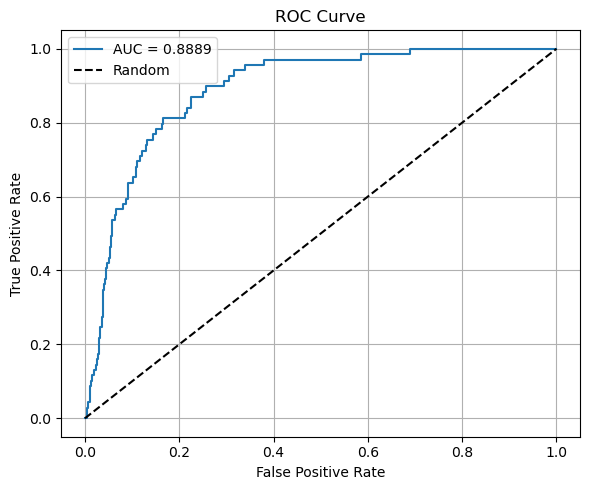

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

model.eval()
y_pred = []
y_scores = []

with torch.no_grad():
    for batch_X, _ in test_loader:
        batch_X = batch_X.to(device) 
        outputs = model(batch_X).squeeze()
        preds = (outputs > 0.5).int()
        y_pred.extend(preds.cpu().tolist())  # On doit ramener les tenseurs à la CPU car les fonctions de scikit-learn ne comprennent pas les tenseurs sur GPU.
        y_scores.extend(outputs.cpu().tolist())

y_true = y_test_tensor.cpu().int().tolist()
y_pred = y_pred

print(classification_report(y_true, y_pred, digits=4))
print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = roc_auc_score(y_true, y_scores)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

- Pour la classe 1, on a beaucoup de faux positifs
- Le modèle ne fait presque pas de faux positifs pour les cas normaux

Ce modèle LSTM est bien pour la classe (0) mais trés faible sur la classe critique (1), ce qui pose un problème industriel majeur. 

Il se peut que la raison derrière ce problème soit le désequilibre des classes.

In [39]:
class_counts = pd.Series(y_sequences).value_counts()
print(class_counts)

class_percentages = class_counts / len(y_sequences) * 100
print(class_percentages)

0    7067
1     278
Name: count, dtype: int64
0    96.215112
1     3.784888
Name: count, dtype: float64


## SMOTE

In [52]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd

X = df_filtered.drop(columns=['Robot_ProtectiveStop', 'Timestamp'])
y = df_filtered['Robot_ProtectiveStop'].astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_series = pd.Series(y_resampled, name='Robot_ProtectiveStop')

X_resampled_df = X_resampled_df.reset_index(drop=True)
y_resampled_series = y_resampled_series.reset_index(drop=True)

print("Distribution après SMOTE :")
print(y_resampled_series.value_counts())

Distribution après SMOTE :
Robot_ProtectiveStop
0    7077
1    7077
Name: count, dtype: int64


In [56]:
X_sequences, y_sequences = create_sequences(X_resampled_df, y_resampled_series)

X_train, X_test, y_train, y_test = train_test_split(
    X_sequences, y_sequences, test_size=0.2, stratify=y_sequences, random_state=42
)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Dataloader
batch_size = 64
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)

model = LSTMClassifier(input_size=X_sequences.shape[2]).to(device)

criterion = nn.BCEWithLogitsLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        optimizer.zero_grad()
        logits = model(batch_X).squeeze()
        loss = criterion(logits, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss / len(train_loader):.4f}")

Epoch 1/50, Loss: 0.2262
Epoch 2/50, Loss: 0.0866
Epoch 3/50, Loss: 0.0748
Epoch 4/50, Loss: 0.0705
Epoch 5/50, Loss: 0.0661
Epoch 6/50, Loss: 0.0623
Epoch 7/50, Loss: 0.0592
Epoch 8/50, Loss: 0.0575
Epoch 9/50, Loss: 0.0545
Epoch 10/50, Loss: 0.0526
Epoch 11/50, Loss: 0.0488
Epoch 12/50, Loss: 0.0466
Epoch 13/50, Loss: 0.0436
Epoch 14/50, Loss: 0.0386
Epoch 15/50, Loss: 0.0380
Epoch 16/50, Loss: 0.0390
Epoch 17/50, Loss: 0.0343
Epoch 18/50, Loss: 0.0337
Epoch 19/50, Loss: 0.0316
Epoch 20/50, Loss: 0.0291
Epoch 21/50, Loss: 0.0294
Epoch 22/50, Loss: 0.0281
Epoch 23/50, Loss: 0.0270
Epoch 24/50, Loss: 0.0247
Epoch 25/50, Loss: 0.0262
Epoch 26/50, Loss: 0.0226
Epoch 27/50, Loss: 0.0232
Epoch 28/50, Loss: 0.0203
Epoch 29/50, Loss: 0.0200
Epoch 30/50, Loss: 0.0180
Epoch 31/50, Loss: 0.0183
Epoch 32/50, Loss: 0.0167
Epoch 33/50, Loss: 0.0170
Epoch 34/50, Loss: 0.0152
Epoch 35/50, Loss: 0.0152
Epoch 36/50, Loss: 0.0121
Epoch 37/50, Loss: 0.0139
Epoch 38/50, Loss: 0.0139
Epoch 39/50, Loss: 0.

              precision    recall  f1-score   support

           0     0.9811    0.9915    0.9863      1413
           1     0.9914    0.9809    0.9862      1416

    accuracy                         0.9862      2829
   macro avg     0.9863    0.9862    0.9862      2829
weighted avg     0.9863    0.9862    0.9862      2829

AUC: 0.9987220163054127


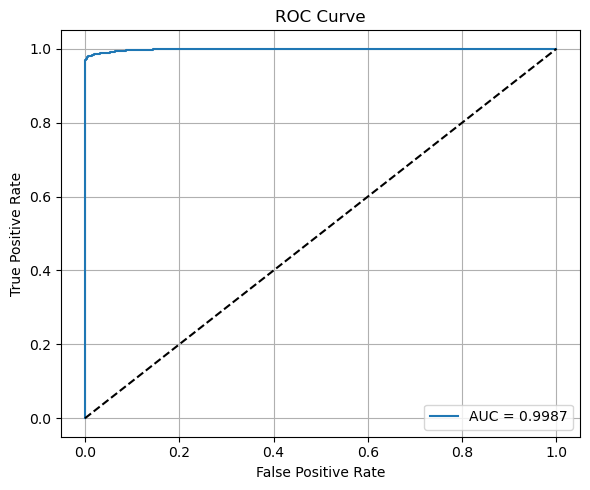

In [57]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

model.eval()
y_true, y_pred, y_scores = [], [], []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        logits = model(batch_X).squeeze()
        probs = torch.sigmoid(logits)
        preds = (probs > 0.5).int()

        y_scores.extend(probs.cpu().tolist())
        y_pred.extend(preds.cpu().tolist())
        y_true.extend(batch_y.cpu().int().tolist())

# Résultats
print(classification_report(y_true, y_pred, digits=4))
print("AUC:", roc_auc_score(y_true, y_scores))

# Courbe ROC
fpr, tpr, _ = roc_curve(y_true, y_scores)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_true, y_scores):.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

✅ Précision & rappel élevés pour les deux classes
→ Le modèle ne favorise plus la classe majoritaire
→ Il détecte presque tous les arrêts sans trop de fausses alertes

✅ F1-score presque identique pour les deux classes
→ Le modèle est parfaitement équilibré

✅ AUC = 0.9987
→ Le modèle a une capacité quasi parfaite à séparer les deux classes (très rare dans la vraie vie industrielle !)

# SARIMA